<a href="https://colab.research.google.com/github/UdeS-PMF/gmq710_test/blob/develop/a2024_gmq710_cours13_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lire des données temporelles avec des anomalies

## Principe

Classer le jeu de données en groupes homogènes avec K-Means et extraire les points loin des groupes

## Visualisation des données

     Valeur
0 -0.379749
1  0.144627
2  0.890809
3 -0.663260
4  0.953372


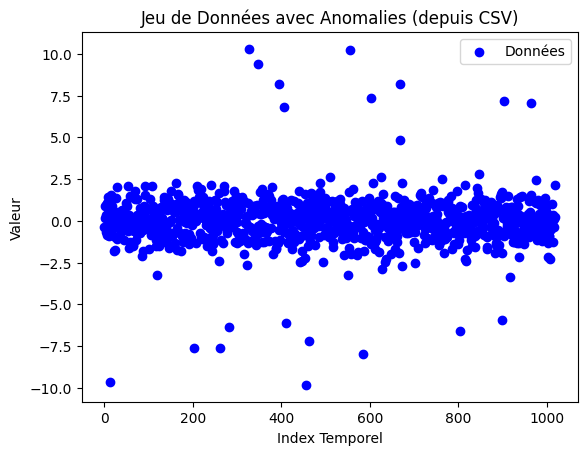

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lire le fichier CSV
df = pd.read_csv('/content/data_with_anomalies.csv')

# Afficher les premières lignes du DataFrame
print(df.head())

# Visualiser les données
plt.scatter(range(len(df)), df['Valeur'], color='blue', label='Données')
plt.xlabel('Index Temporel')
plt.ylabel('Valeur')
plt.title('Jeu de Données avec Anomalies (depuis CSV)')
plt.legend()
plt.show()


## Traitements

In [ ]:
# on importe les libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

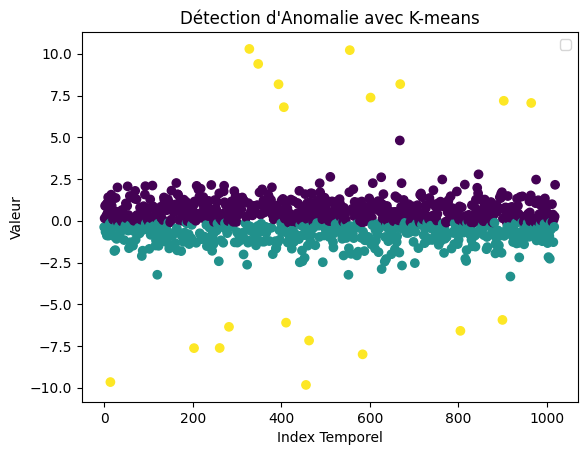

In [ ]:
# Lire le fichier CSV
df = pd.read_csv('/content/data_with_anomalies.csv')

# Sélectionner la colonne des valeurs pour l'analyse
X = df[['Valeur']]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Choisir le nombre optimal de clusters
nombre_clusters_optimal = 2  # on peut décider de 2 groupes

# Appliquer K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=nombre_clusters_optimal, random_state=42)
kmeans.fit(X_scaled)

# Ajouter une colonne au DataFrame indiquant le cluster de chaque point
df['Cluster'] = kmeans.labels_

# Définir une distance seuil pour considérer un point comme une anomalie
seuil_anomalie = 3

# Calculer la distance euclidienne indépendamment du signe
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[df['Cluster']], axis=1)

# Identifier les anomalies
df['Anomalie'] = distances > seuil_anomalie

# on change le cluster pour les anomalies
df.loc[df['Anomalie'], 'Cluster'] = 2

# Visualiser les résultats
plt.scatter(range(len(df)), df['Valeur'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Index Temporel')
plt.ylabel('Valeur')
plt.title('Détection d\'Anomalie avec K-means')
plt.legend()
plt.show()
